In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [11]:
import logging 
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [12]:
_URL = 'https://download.mlcc.google.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

68606236/68606236 [==============================] - 16s 0us/step


In [13]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

FIND: Parameter format not correct


In [14]:
base_dir = os.path.join(zip_dir_base,'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats') # directory with our training cat images
train_dogs_dir = os.path.join(train_dir,'dogs') # directory with our training dogs images
validation_cats_dir = os.path.join(validation_dir,'cats') # directory with our validation cat images
validation_dogs_dir = os.path.join(validation_dir,'dogs') # directory with our validation dogs images

Understanding our data


In [15]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


In [17]:
print("Cat training images:{}".format(num_cats_tr))
print("Dog training images:{}".format(num_dogs_tr))
print("Cat validation images:{}".format(num_cats_val))
print("Dog validation images:{}".format(num_dogs_val))
print("Total training:{}".format(total_train))
print("Total validation:{}".format(total_val))

Cat training images:1000
Dog training images:1000
Cat validation images:500
Dog validation images:500
Total training:2000
Total validation:1000


# Setting Model Parameters

In [18]:
BATCH_SIZE = 100
IMG_SHAPE =150

# Data Pre-processing
Here we used rescaling factor as 1./255<br>
'1.' defines its a explictly float not  a '1' defines its a integer<br>
So 1/255 = 0.00392<br>
For pixels :-
1. Pixel value = 1 ; rescaled = 1 * 0.00392 = 0.00392   
2. Pixel value = 120 ; rescaled = 120 * 0.00392 = 0.4704

In [19]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [20]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle = True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),#(150,150)
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [21]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle = False,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE),#(150,150)
                                                           class_mode='binary')

Found 1000 images belonging to 2 classes.


# Visualizing Training Images

Here the images are stored in 'sample_training_images' & '_' stands for ignore the next value i.e. labels 

In [23]:
sample_training_images,_ =next(train_data_gen)

In [28]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show() 

Visiualizing the Data

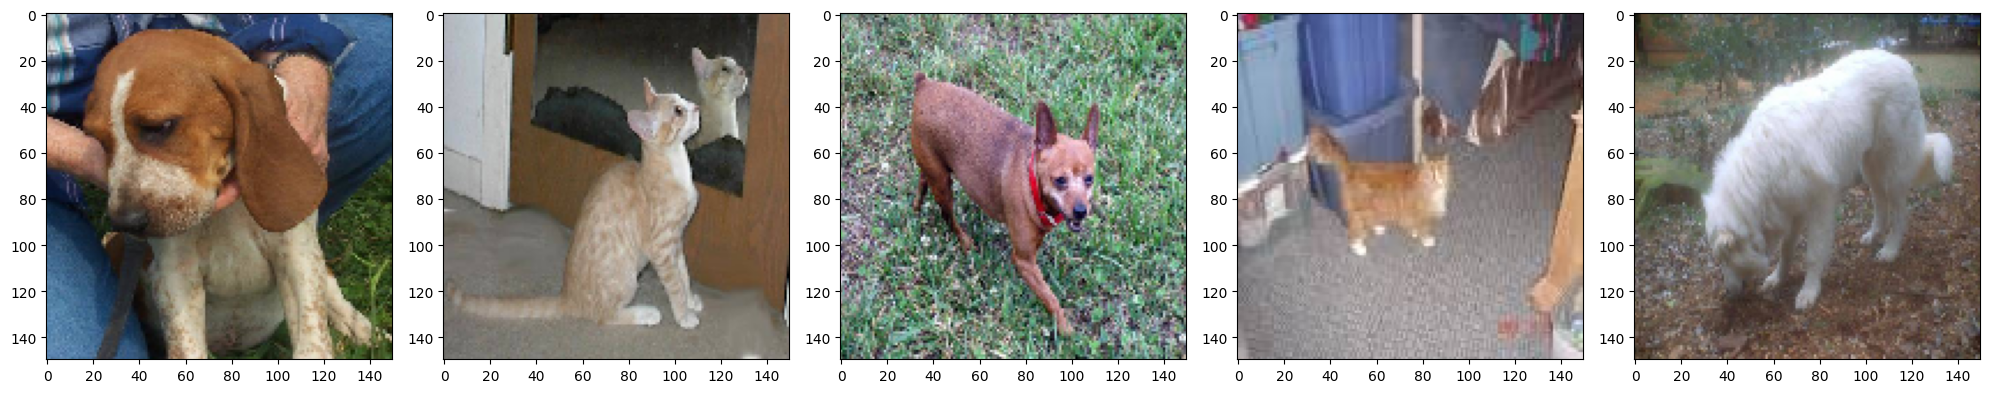

In [29]:
plotImages(sample_training_images[:5]) #plots 0 to 4

# Model creation
relu - activation function <br>
softmax - for output layer

The model consist of 4 layers of convolution block & maxpooling <br>
Why 4 layers?<br>
For Binary image classification 4 layers are enough to learn features like ears,mustache<br>
pixels -> edges -> shapes -> objects

Each convolutional layer learns progressively more complex features:
1. First Conv Layer (32 filters)
- Detects very simple patterns: edges, corners, basic color contrasts.
- Think of it as the "low-level vision" stage.
2. Second Conv Layer (64 filters)
- Learns combinations of edges → textures, simple shapes.
- For example, fur patterns or eye outlines.
3. Third Conv Layer (128 filters)
- Captures more detailed structures: ears, noses, or partial object shapes.
- Moves toward "mid-level features."
4. Fourth Conv Layer (128 filters again)
- Extracts high-level features: cat vs dog characteristics (whiskers, snout shapes).
- This is closer to "semantic understanding."


In [31]:
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(2),

])